# Metodos de resolucion PDE 
    -Difusion
    -Ondas

### 🔥 Metodo de Lineas para Ecuacion de Difusion

El siguiente codigo es con condiciones de Dirichlet

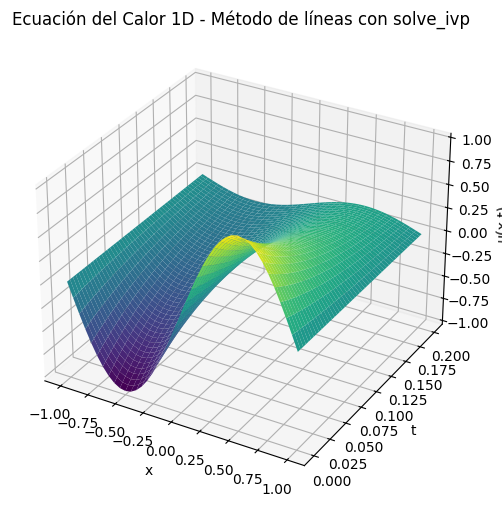

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros
L = 1.0
alpha = 1.0
dx = 0.05
x = np.arange(-L, L + dx, dx)
N = len(x)

# Construcción de la matriz de segunda derivada (Dirichlet homogénea)
def D2_dirichlet(n, h):
    D2 = np.zeros((n, n))
    for i in range(1, n - 1):
        D2[i, i - 1] = 1 / h**2
        D2[i, i]     = -2 / h**2
        D2[i, i + 1] = 1 / h**2
    return D2

"""
def D2_neumann(n, h):
    D2 = np.zeros((n, n))
    for i in range(1, n - 1):
        D2[i, i - 1] = 1 / h**2
        D2[i, i]     = -2 / h**2
        D2[i, i + 1] = 1 / h**2

    # Neumann izquierda (aprox: u_1 - u_0 = 0)
    D2[0, 0] = -2 / h**2
    D2[0, 1] = 2 / h**2

    # Neumann derecha (aprox: u_N-1 - u_N-2 = 0)
    D2[-1, -2] = 2 / h**2
    D2[-1, -1] = -2 / h**2

    return D2

"""

A = D2_dirichlet(N, dx)

# Sistema de EDOs para el calor: du/dt = alpha * A u
def sistema(t, u):
    return alpha * (A @ u)

# Condición inicial
u0 = np.sin(np.pi * x)
u0[0] = u0[-1] = 0  # Dirichlet homogénea

# Intervalo temporal
t_span = (0, 0.2)
t_eval = np.linspace(*t_span, 300)

# Resolver con solve_ivp
sol = solve_ivp(sistema, t_span, u0, t_eval=t_eval, method='RK45')

# Extraer solución
U = sol.y  # columnas: tiempo, filas: espacio

# Graficar
X, T = np.meshgrid(x, sol.t)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, U.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Ecuación del Calor 1D - Método de líneas con solve_ivp')
plt.show()


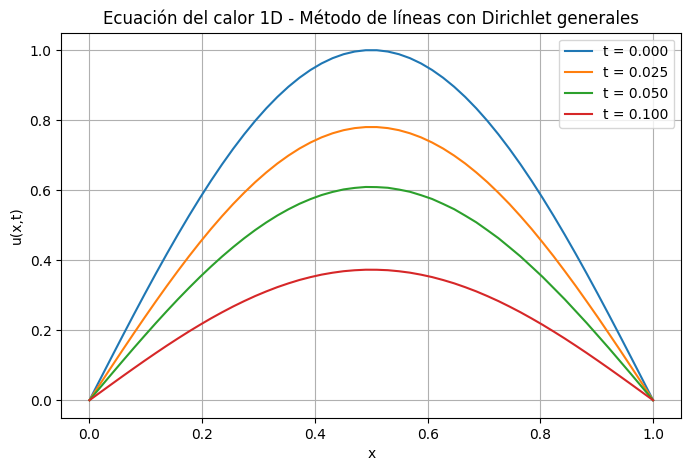

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ================================
# Parámetros del problema
# ================================
L = 1.0                 # Longitud del dominio espacial
alpha = 1.0             # Difusividad térmica
Nx = 50                 # Número de puntos espaciales internos
x = np.linspace(0, L, Nx + 2)  # Incluye extremos para condiciones de frontera
dx = x[1] - x[0]

# ================================
# Condiciones de Dirichlet
# ================================
a = 0   # u(0, t) = a
b = 0  # u(L, t) = b

# ================================
# Matriz del sistema (solo puntos internos)
# ================================
A = np.zeros((Nx, Nx))
for i in range(Nx):
    if i > 0:
        A[i, i - 1] = 1
    A[i, i] = -2
    if i < Nx - 1:
        A[i, i + 1] = 1
A = alpha * A / dx**2

# ================================
# Condición inicial (solo puntos internos)
# ================================
u0_full = np.sin(np.pi * x)      # inicial en todo el dominio
u0 = u0_full[1:-1]               # solo puntos internos

# ================================
# Sistema de EDOs: u' = A u + corrección de bordes
# ================================
def heat_eq(t, u):
    # Agregamos condiciones de borde en los extremos
    dudt = A @ u
    
    # Corrección por condiciones de Dirichlet (bordes fijos a, b)
    dudt[0] += alpha * a / dx**2
    dudt[-1] += alpha * b / dx**2
    return dudt

# ================================
# Resolución en el tiempo
# ================================
t_span = (0, 0.1)
t_eval = np.linspace(*t_span, 200)
sol = solve_ivp(heat_eq, t_span, u0, t_eval=t_eval)

# ================================
# Gráfica de resultados
# ================================
plt.figure(figsize=(8, 5))
for idx in [0, 50, 100, 199]:
    u_plot = np.empty(Nx + 2)
    u_plot[0] = a             # aplicar Dirichlet en x = 0
    u_plot[-1] = b            # aplicar Dirichlet en x = L
    u_plot[1:-1] = sol.y[:, idx]  # puntos internos
    plt.plot(x, u_plot, label=f"t = {sol.t[idx]:.3f}")

plt.title("Ecuación del calor 1D - Método de líneas con Dirichlet generales")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid(True)
plt.legend()
plt.show()


El siguiente codigo es con condiciones de Dirichlet y Neumann

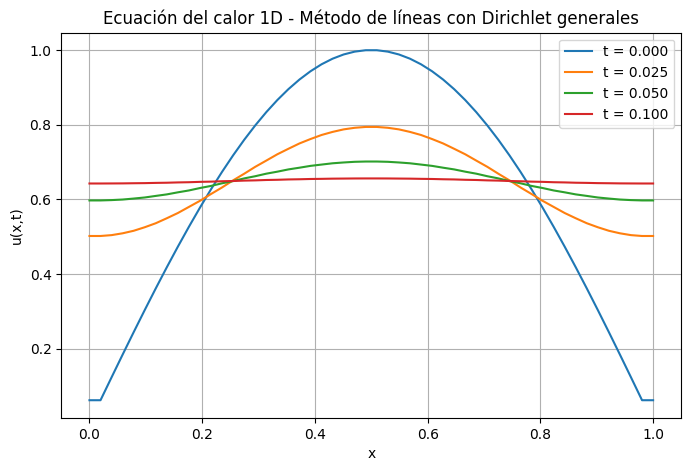

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ================================
# Parámetros del problema
# ================================
L = 1.0                 # Longitud del dominio espacial
alpha = 1.0             # Difusividad térmica
Nx = 50                 # Número de puntos espaciales internos
x = np.linspace(0, L, Nx + 2)  # Incluye extremos para condiciones de frontera
dx = x[1] - x[0]

# ================================
# Condiciones de Dirichlet
# ================================
a = 1   # u(0, t) = a
b = -1  # u(L, t) = b

# ================================
# Matriz del sistema (solo puntos internos)
# ================================
A = np.zeros((Nx, Nx))
for i in range(Nx):
    if i > 0:
        A[i, i - 1] = 1
    A[i, i] = -2
    if i < Nx - 1:
        A[i, i + 1] = 1
A = alpha * A / dx**2

# ================================
# Condición inicial (solo puntos internos)
# ================================
u0_full = np.sin(np.pi * x)      # inicial en todo el dominio
u0 = u0_full[1:-1]               # solo puntos internos

# ================================
# Sistema de EDOs: u' = A u + corrección de bordes
# ================================
def heat_eq_neumann(t, u):
    # q0, qL: valores de la derivada en los bordes
    q0 = 0.0   # ejemplo para Neumann izquierda
    qL = 0.0   # ejemplo para Neumann derecha
    
    # Reconstruir valores de frontera ficticios
    u_left_ghost = u[0] - 2 * q0 * dx
    u_right_ghost = u[-1] + 2 * qL * dx
    
    # Crear vector con puntos frontera ficticios para calcular segundas derivadas
    u_full = np.zeros(len(u) + 2)
    u_full[0] = u_left_ghost
    u_full[1:-1] = u
    u_full[-1] = u_right_ghost
    
    # Calcular segunda derivada con diferencias centradas
    dudt = alpha * (u_full[:-2] - 2 * u_full[1:-1] + u_full[2:]) / dx**2
    return dudt

# ================================
# Resolución en el tiempo
# ================================
t_span = (0, 0.1)
t_eval = np.linspace(*t_span, 200)
sol = solve_ivp(heat_eq_neumann, t_span, u0, t_eval=t_eval)

# ================================
# Gráfica de resultados
# ================================
plt.figure(figsize=(8, 5))
for idx in [0, 50, 100, 199]:
    u_plot = np.zeros(Nx + 2)
    u_plot[1:-1] = sol.y[:, idx]
    u_plot[0] = u_plot[1]  
    u_plot[-1] = u_plot[-2]
    plt.plot(x, u_plot, label=f"t = {sol.t[idx]:.3f}")

plt.title("Ecuación del calor 1D - Método de líneas con Dirichlet generales")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid(True)
plt.legend()
plt.show()


Usando FFT / IFFT

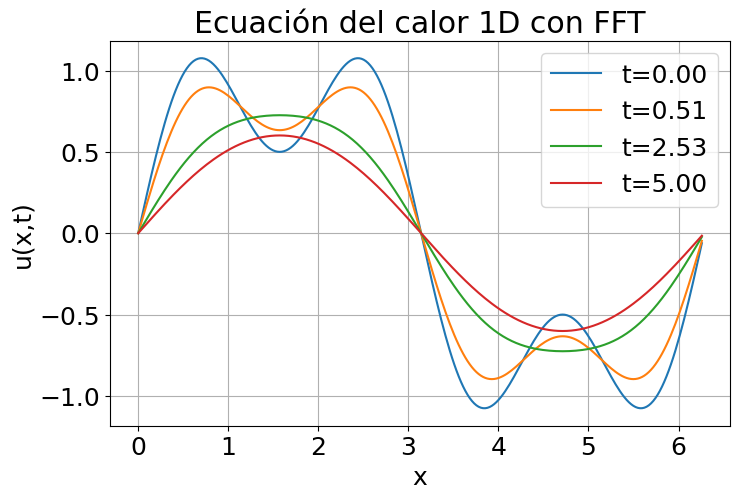

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros
L = 2 * np.pi
N = 256
alpha = 0.1
x = np.linspace(0, L, N, endpoint=False)
k = np.fft.fftfreq(N, d=L/(2*np.pi*N))  # frecuencias espaciales

# Condición inicial periódica
u0 = np.sin(x) + 0.5 * np.sin(3*x)

def source(x,t):
    return np.zeros_like(x)

def heat_fft_source(t, u_hat):
    f = source(x, t)
    f_hat = np.fft.fft(f)
    return -alpha * (k**2) * u_hat + f_hat

u0_hat = np.fft.fft(u0)

def real_system(t, y):
    y_complex = y[:N] + 1j * y[N:]
    dy_complex = heat_fft_source(t, y_complex)
    return np.concatenate([dy_complex.real, dy_complex.imag])

y0 = np.concatenate([u0_hat.real, u0_hat.imag])

t_span = (0, 5)
t_eval = np.linspace(*t_span, 100)

sol = solve_ivp(real_system, t_span, y0, t_eval=t_eval)

plt.figure(figsize=(8,5))
for idx in [0, 10, 50, 99]:
    u_hat = sol.y[:N, idx] + 1j * sol.y[N:, idx]
    u = np.fft.ifft(u_hat).real
    plt.plot(x, u, label=f't={sol.t[idx]:.2f}')

plt.title('Ecuación del calor 1D con FFT')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()


### 🌊 Metodo de Lineas para Ecuacion de Ondas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros
L = 1.0
c = 1.0
dx = 0.05
x = np.arange(-L, L + dx, dx)
N = len(x)

# Matriz de segunda derivada (con Dirichlet homogénea)
def D2_dirichlet(n, h):
    D2 = np.zeros((n, n))
    for i in range(1, n - 1):
        D2[i, i - 1] = 1 / h**2
        D2[i, i]     = -2 / h**2
        D2[i, i + 1] = 1 / h**2
    return D2

"""
def D2_neumann(n, h):     con condiciones de neumann homogeneas
    D2 = np.zeros((n, n))
    for i in range(1, n - 1):
        D2[i, i - 1] = 1 / h**2
        D2[i, i]     = -2 / h**2
        D2[i, i + 1] = 1 / h**2

    # Neumann izquierda (aprox: u_1 - u_0 = 0)
    D2[0, 0] = -2 / h**2
    D2[0, 1] = 2 / h**2

    # Neumann derecha (aprox: u_N-1 - u_N-2 = 0)
    D2[-1, -2] = 2 / h**2
    D2[-1, -1] = -2 / h**2

    return D2

"""

A = D2_dirichlet(N, dx)

# Sistema de primer orden: [u, v]
def sistema(t, y):
    u = y[:N]
    v = y[N:]

    """ FORZAR condiciones de Dirichlet en extremos
    u[0] = u[-1] = 0
    v[0] = v[-1] = 0"""

    du_dt = v
    dv_dt = c**2 * A @ u
    return np.concatenate([du_dt, dv_dt])

# Condición inicial
u0 = np.sin(np.pi * x)     # desplazamiento
v0 = np.zeros_like(x)      # velocidad
y0 = np.concatenate([u0, v0])

# Tiempo de simulación
t_span = (0, 1.0)
t_eval = np.linspace(*t_span, 500)

# Resolver el sistema
sol = solve_ivp(sistema, t_span, y0, t_eval=t_eval, method='RK45')

# Extraer u(x,t)
U = sol.y[:N, :]  # cada fila es u(x_i, t)

# Graficar
X, T = np.meshgrid(x, sol.t)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, U.T, cmap='plasma')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Ecuación de ondas 1D - Método de líneas ')
plt.show()


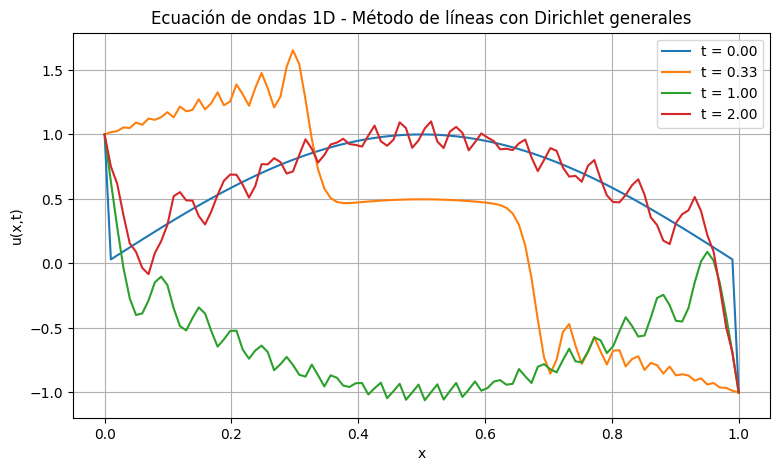

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ============================
# Parámetros del problema
# ============================
L = 1.0
c = 1.0
Nx = 100
x = np.linspace(0, L, Nx + 2)  # Incluye extremos para condiciones de frontera
dx = x[1] - x[0]

# ============================
# Condiciones de Dirichlet
# ============================
a = 1.0   # u(0, t) = a
b = -1.0  # u(L, t) = b

# ============================
# Matriz A: Laplaciano discreto para puntos internos
# ============================
A = np.zeros((Nx, Nx))
for i in range(Nx):
    if i > 0:
        A[i, i - 1] = 1
    A[i, i] = -2
    if i < Nx - 1:
        A[i, i + 1] = 1
A = c**2 * A / dx**2

# ============================
# Condiciones iniciales
# ============================
u0_full = np.sin(np.pi * x)  # definida en todos los nodos
u0 = u0_full[1:-1]           # solo puntos internos
v0 = np.zeros(Nx)            # velocidad inicial (u_t)

# ============================
# Sistema de EDOs de primer orden
# ============================
def wave_system(t, Y):
    u = Y[:Nx]
    v = Y[Nx:]
    
    dudt = v.copy()

    # Corrección en la segunda derivada por condiciones de borde
    dvdt = A @ u
    dvdt[0]   += c**2 * a / dx**2
    dvdt[-1]  += c**2 * b / dx**2

    return np.concatenate([dudt, dvdt])

# ============================

t_span = (0, 2)
t_eval = np.linspace(*t_span, 300)

Y0 = np.concatenate([u0, v0])

sol = solve_ivp(wave_system, t_span, Y0, t_eval=t_eval)

# ============================
# Gráfica en distintos tiempos
# ============================
plt.figure(figsize=(9, 5))
for idx in [0, 50, 150, 299]:
    u_sol = np.empty(Nx + 2)
    u_sol[0] = a
    u_sol[-1] = b
    u_sol[1:-1] = sol.y[:Nx, idx]
    plt.plot(x, u_sol, label=f"t = {sol.t[idx]:.2f}")

plt.title("Ecuación de ondas 1D - Método de líneas con Dirichlet generales")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid(True)
plt.legend()
plt.show()


Con condiciones de Neumann:

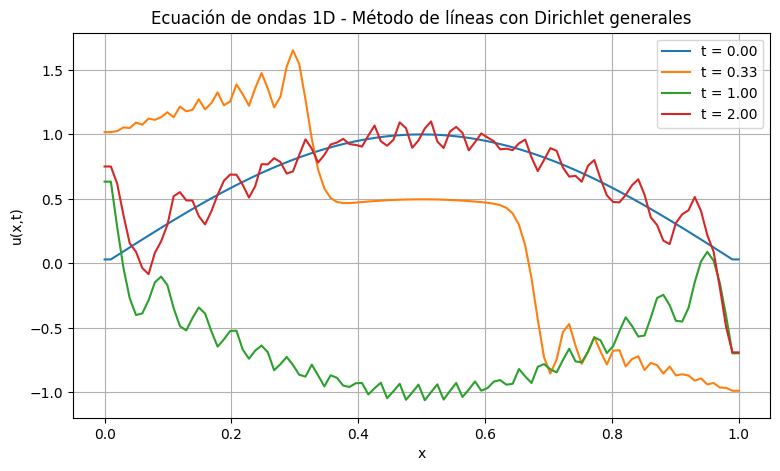

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ============================
# Parámetros del problema
# ============================
L = 1.0
c = 1.0
Nx = 100
x = np.linspace(0, L, Nx + 2)  # Incluye extremos para condiciones de frontera
dx = x[1] - x[0]

# ============================
# Condiciones de Dirichlet
# ============================
a = 1.0   # u(0, t) = a
b = -1.0  # u(L, t) = b

# ============================
# Matriz A: Laplaciano discreto para puntos internos
# ============================
A = np.zeros((Nx, Nx))
for i in range(Nx):
    if i > 0:
        A[i, i - 1] = 1
    A[i, i] = -2
    if i < Nx - 1:
        A[i, i + 1] = 1
A = c**2 * A / dx**2

# ============================
# Condiciones iniciales
# ============================
u0_full = np.sin(np.pi * x)  # definida en todos los nodos
u0 = u0_full[1:-1]           # solo puntos internos
v0 = np.zeros(Nx)            # velocidad inicial (u_t)

# ============================
# Sistema de EDOs de primer orden
# ============================
def wave_system_neumann(t, Y):
    u = Y[:Nx]
    v = Y[Nx:]

    # Parámetros de Neumann (derivadas en los extremos)
    q0 = 0.0  # du/dx en x=0
    qL = 0.0  # du/dx en x=L

    # Calcular puntos fantasma para u
    u_left_ghost = u[1] - 2 * q0 * dx
    u_right_ghost = u[-2] + 2 * qL * dx

    # Construir vector completo con puntos fantasma
    u_full = np.empty(Nx + 2)
    u_full[0] = u_left_ghost
    u_full[1:-1] = u
    u_full[-1] = u_right_ghost

    dudt = v

    # Calcular segunda derivada con diferencias centradas
    dvdt = c**2 * (u_full[:-2] - 2 * u_full[1:-1] + u_full[2:]) / dx**2

    return np.concatenate([dudt, dvdt])

# ============================

t_span = (0, 2)
t_eval = np.linspace(*t_span, 300)

Y0 = np.concatenate([u0, v0])

sol = solve_ivp(wave_system, t_span, Y0, t_eval=t_eval)

# ============================
# Gráfica en distintos tiempos
# ============================
plt.figure(figsize=(9, 5))
for idx in [0, 50, 150, 299]:
    u_sol = np.empty(Nx + 2)
    # Para los extremos podés extrapolar o repetir valores cercanos
    u_sol[1:-1] = sol.y[:Nx, idx]
    u_sol[0] = u_sol[1]    # extrapolación simple izquierda
    u_sol[-1] = u_sol[-2]  # extrapolación simple derecha
    plt.plot(x, u_sol, label=f"t = {sol.t[idx]:.2f}")

plt.title("Ecuación de ondas 1D - Método de líneas con Dirichlet generales")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid(True)
plt.legend()
plt.show()


# 🌪️ Ecuación de Burgers 1D

La **ecuación de Burgers viscosa** en una dimensión está dada por:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}, \quad x \in [0, L], \quad t > 0
$$

donde:

-  u(x, t) : velocidad del fluido,
-  v > 0 : coeficiente de viscosidad.

### Condición inicial

$$
u(x, 0) = f(x), \quad x \in [0, L]
$$

Por ejemplo:

$$
f(x) = \sin(\pi x)
$$

### Condiciones de frontera (Dirichlet homogéneas)

$$
u(0, t) = 0, \quad u(L, t) = 0, \quad t > 0
$$


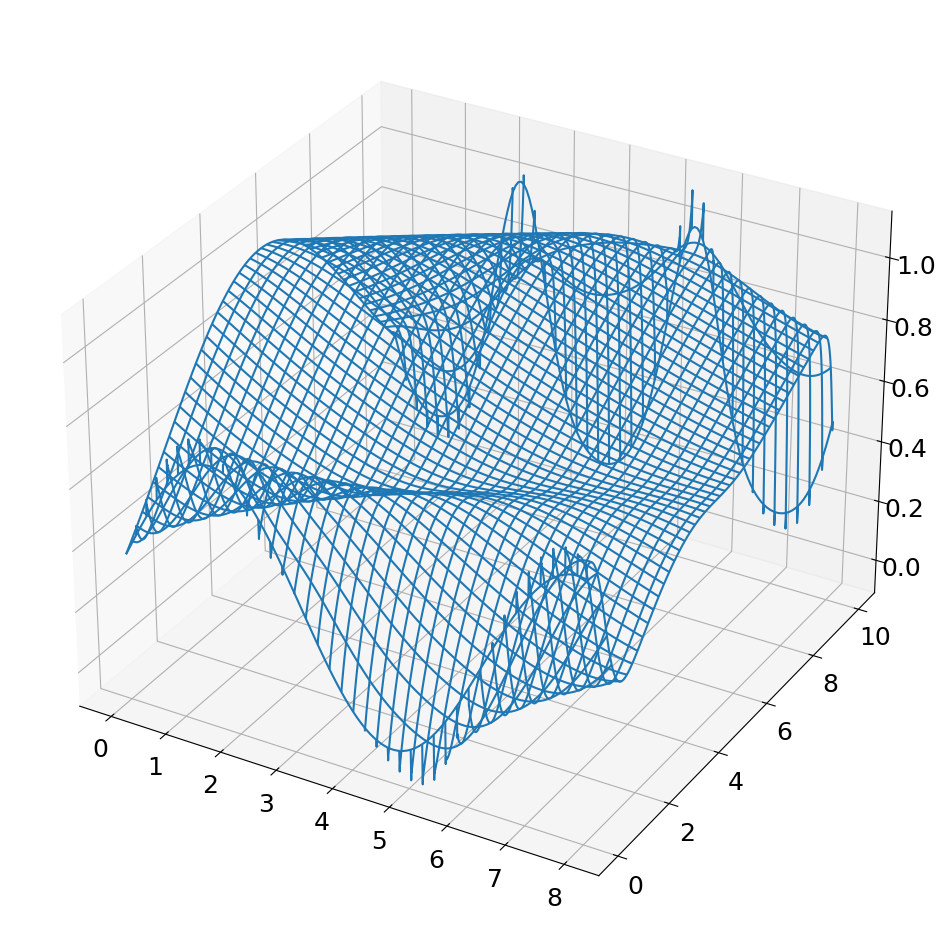

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

mu = 1
nu = 0.1

#Spatial mesh
L_x = 10 #Range of the domain according to x [m]
dx = 0.01 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x) #Spatial array

#Temporal mesh
L_t = 8 #Duration of simulation [s]
dt = 0.05  #Infinitesimal time
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t) #Temporal array

#Wave number discretization
k = 2*np.pi*np.fft.fftfreq(N_x, d = dx)


#Def of the initial condition
u0 = np.exp(-(X-5)**2/25) #Condiciòn inicial t = 0


#Definition of ODE system (PDE ---(FFT)---> ODE system)
def burg_system(u,t,k,mu, nu):
    #Spatial derivative in the Fourier domain
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat

    #Switching in the spatial domain
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)

    #ODE resolution
    u_t =  -mu*u*u_x+nu*u_xx
    u_t[0]=u0[0]*np.cos(t) #Acá impongo la primera condición de contorno
    u_t[-1]=-2*u[-1]*np.cos(2*t)#Acá impongo la segunda
    return u_t.real


#PDE resolution (ODE system resolution)
U = odeint(burg_system, u0, T, args=(k,mu, nu, ), mxstep=5000).T


To, Xo= np.meshgrid(T, X)
Z = U

ax = plt.axes(projection ='3d')
ax.plot_wireframe(To, Xo, Z)

plt.show()

# 📘 Ecuación de Poisson 1D con condiciones de contorno mixtas

Queremos resolver la siguiente **ecuación de Poisson** en una dimensión:

$$
- u''(x) = f(x), \quad x \in (0, 1)
$$

donde:

- \( u(x) \) es la función incógnita,
- \( f(x) \) es una función fuente dada.

### Condiciones de contorno

- **Neumann** en el extremo izquierdo:

  $$
  u'(0) = \beta
  $$

- **Dirichlet** en el extremo derecho:

  $$
  u(1) = \gamma
  $$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def construir_matriz_A_y_b(m, h, f, beta, gamma):
    A = np.zeros((m, m))
    b = f(np.linspace(h, 1 - h, m))

    # Condición de Neumann en x = 0: u'(0) = beta (centrada)
    A[0, 0] = -2 / h**2
    A[0, 1] =  2 / h**2
    b[0] -= 2 * beta / h  # Ajuste por la derivada

    # Filas internas
    for i in range(1, m - 1):
        A[i, i-1] = 1 / h**2
        A[i, i]   = -2 / h**2
        A[i, i+1] = 1 / h**2

    # Condición de Dirichlet en x = 1: u(1) = gamma
    A[m-1, m-2] = 1 / h**2
    A[m-1, m-1] = -2 / h**2
    b[m-1] -= gamma / h**2  # Ajuste por valor de frontera

    return A, b

def resolver_poisson_neumann_dirichlet(f, m=100, beta=0, gamma=0):
    h = 1 / (m + 1)
    A, b = construir_matriz_A_y_b(m, h, f, beta, gamma)

    # Resolver el sistema lineal
    u_interior = np.linalg.solve(A, b)

    # Agregar extremos
    u = np.zeros(m + 2)
    u[1:-1] = u_interior
    u[-1] = gamma  # Dirichlet
    # u[0] se deja como está; se puede estimar con u'(0) = beta si se quiere

    x_full = np.linspace(0, 1, m + 2)
    return x_full, u


In [ ]:
f = lambda x: np.ones_like(x)  # fuente constante f(x) = 1
beta = 0      # u'(0) = 0  (Neumann)
gamma = 0     # u(1) = 0   (Dirichlet)
x, u = resolver_poisson_neumann_dirichlet(f, m=100, beta=beta, gamma=gamma)

plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solución de -u\'\' = f(x) con Neumann + Dirichlet')
plt.grid(True)
plt.show()
